In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
L = 1
T = 0.3  #tiempo max
dx = h = 0.2
dt = k = 0.1
alfa = 0.1

In [4]:
r = alfa*k/h**2; r

0.25

In [5]:
# valores frontera
m = round(L/dx) + 1
n = round(T/dt) + 1

x = np.linspace(0,L,m) #para plotear

sol = np.zeros((n,m))  #matriz con las soluciones aproximadas
w = np.zeros(m)  #reserva para el valor inicial
for i in range(m):
    w[i] = 100
w[0] = 20 #extremo izquierdo
w[m-1] = 40
sol[0] = w.copy()
w

array([ 20., 100., 100., 100., 100.,  40.])

In [6]:
#primera fila para predecir
u = w.copy()
for i in range(1,m-1):
    u[i] = r*w[i-1] + (1-2*r)*w[i] + r*w[i+1]
sol[1] = u.copy()
u

array([ 20.,  80., 100., 100.,  85.,  40.])

In [7]:
w = u.copy()
for i in range(1,m-1):
    u[i] = r*w[i-1] + (1-2*r)*w[i] + r*w[i+1]
sol[2] = u.copy()
u

array([20.  , 70.  , 95.  , 96.25, 77.5 , 40.  ])

In [8]:
w = u.copy()
for i in range(1,m-1):
    u[i] = r*w[i-1] + (1-2*r)*w[i] + r*w[i+1]
sol[3] = u.copy()
u

array([20.    , 63.75  , 89.0625, 91.25  , 72.8125, 40.    ])

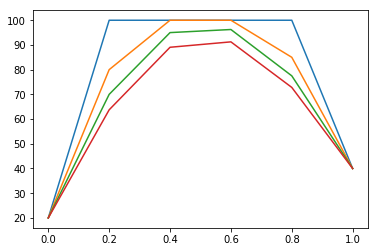

In [9]:
plt.plot(x,sol[0])
plt.plot(x,sol[1])
plt.plot(x,sol[2])
plt.plot(x,sol[3])

In [89]:
from matplotlib.animation import FuncAnimation

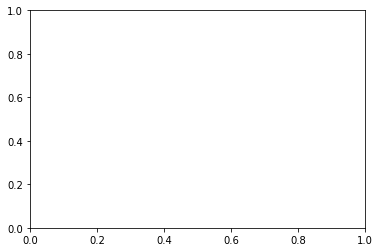

In [147]:
fig, ax = plt.subplots()
def animate(i):
    #ax.cla()
    ax.plot(x,sol[i])

In [148]:
anim = FuncAnimation(fig,animate,4,interval=1000,repeat=True)

In [92]:
from IPython.display import HTML

In [149]:
HTML(anim.to_html5_video())

### Método Alternativo, usando matrices

In [31]:
def tridiag(a,b,c,N):
    A = np.zeros([N,N])
    np.fill_diagonal(A[1:,:-1],a)
    np.fill_diagonal(A[:-1,1:],c)
    np.fill_diagonal(A,b)
    return A

A = tridiag(r,1-2*r,r,m)
A

array([[0.5 , 0.25, 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.5 , 0.25, 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.5 , 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.5 , 0.25, 0.  ],
       [0.  , 0.  , 0.  , 0.25, 0.5 , 0.25],
       [0.  , 0.  , 0.  , 0.  , 0.25, 0.5 ]])

In [15]:
sol[0]

array([ 20., 100., 100., 100., 100.,  40.])

Una forma es multiplicar $A \cdot w^{j-1} $ para obtener $w^{j}$

In [32]:
np.dot(A,sol[0])

array([ 35.,  80., 100., 100.,  85.,  45.])

Otra forma es operar solo los puntos interiores

In [26]:
A = tridiag(r,1-2*r,r,m-2); A

array([[0.5 , 0.25, 0.  , 0.  ],
       [0.25, 0.5 , 0.25, 0.  ],
       [0.  , 0.25, 0.5 , 0.25],
       [0.  , 0.  , 0.25, 0.5 ]])

In [29]:
np.dot(A,sol[0][1:-1]) + r*np.array([20,0,0,40])

array([ 80., 100., 100.,  85.])

In [30]:
np.dot(A,sol[1][1:-1]) + r*np.array([20,0,0,40])

array([70.  , 95.  , 96.25, 77.5 ])